# Trying to reproduce Pt Barrow results from Piao 2008

Possible causes leading to discrepancies:
- different raw data used: origin, frequency
- different pars used in ccgcrv
- different ccgcrv code base (python vs C)
- ...?

**Raw data tests:**

Create standardized files to test for each type of raw input


### Modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
from ccgcrv import ccg_dates
import numpy as np
from copy import deepcopy

### Load and define functions that get the ccgcrv fits

The two fucntions should do the same, i.e. fit ccg and return the results. The return format is different. get_ccgcrv has more arguments, so more options.

In [2]:
# Load get_ccgcrv function
from get_ccgcrv import ccgcrv_fit_mult
from get_ccgcrv import ccgcrv_fit_one

### Plotting function

In [3]:

def plot_piao_fig1a(ccg_y, fig1a, year_beg=1980, year_end=2002):

    from scipy import stats
    import pandas as pd
    import matplotlib.pyplot as plt

    # Prepare the data and calculate anomalies ----

    # Get the ccg data
    azc = ccg_y['tcu_doy'].loc[ccg_y['year'].between(year_beg, year_end)]
    azc.loc[azc < 150] = azc.loc[azc < 150] + 365
    years = ccg_y['year'].loc[ccg_y['year'].between(year_beg, year_end)]

    # Calculate anomalies
    azc_ano = azc - azc.mean()

    xy = pd.DataFrame({'year': years, 'azc_ano': azc_ano.to_numpy()})
    xy = pd.merge(xy,fig1a, on='year')

    reg = stats.linregress(xy['azc_ano'], xy['azc_ano_fig1a'])
    r_val = "r = {:.3f}".format(reg.rvalue)
    p_val = "p = {:.3f}".format(reg.pvalue)

    # Plot the time series
    plt.rcParams['figure.figsize'] = [8, 5]
    fig,ax=plt.subplots()
    ax.plot(years, xy['azc_ano'], '--', color='red', label='AZC anomaly')
    ax.plot(years, xy['azc_ano_fig1a'], '-', color='red', label='AZC anomaly Piao Fig1a')
    ax.set_ylabel("Autumn zero crossing anomaly (days)", color="red")
    ax.set_ylim([-15, 15])
    plt.text(0.5, 0.95, r_val+'; '+p_val, transform=ax.transAxes)
    plt.show()

### Set parameters

In [4]:
# Default parameter values as used in the ccgcrv code.
ccg_pars_def = {
    'shortterm': 80,
    'longterm': 667,
    'sampleinterval': 0,
    'numpolyterms': 3,
    'numharmonics': 4,
    'timezero': -1,
    'gap': 0,
    'use_gain_factor': False,
    'debug': False
}

# Test parameter sets

# Set sampleinterval to 1
ccg_pars_1 = deepcopy(ccg_pars_def)
ccg_pars_1['sampleinterval'] = 1


In [5]:
# Prepare raw input data

# Read in BRW data

# Naming:
# brw = Point Barrow; (method) i,f,m=insitu,flask,merge; (frequency) d,m,h,e=daily,monthly,hourly,event; 
# (origin) uk,no,sc=unkown,noaa,scripps
brw_i_d_uk = pd.read_csv('../data/piao_test/brw-insitu_day.csv')
brw_i_m_uk = pd.read_csv('../data/piao_test/brw-insitu_mon.csv')
brw_f_m_uk = pd.read_csv('../data/piao_test/brw-flask_mon.csv')
brw_f_e_no = pd.read_csv('../data/piao_test/co2_brw_surface-flask_1_ccgg_event.csv')
brw_f_m_no = pd.read_csv('../data/piao_test/co2_brw_surface-flask_1_ccgg_month.csv')
brw_i_h_no = pd.read_csv('../data/piao_test/co2_brw_surface-insitu_1_ccgg_HourlyData.csv')
brw_i_d_no = pd.read_csv('../data/piao_test/co2_brw_surface-insitu_1_ccgg_DailyData.csv')
brw_i_m_no = pd.read_csv('../data/piao_test/co2_brw_surface-insitu_1_ccgg_MonthlyData.csv')
brw_f_d_sc = pd.read_csv('../data/piao_test/scripps_daily_flask_co2_ptb.csv')
brw_m_d_sc = pd.read_csv('../data/piao_test/scripps_daily_merge_co2_ptb.csv')
brw_f_m_sc = pd.read_csv('../data/piao_test/scripps_monthly_flask_co2_ptb.csv')
brw_m_m_sc = pd.read_csv('../data/piao_test/scripps_monthly_merge_co2_ptb.csv')

brw_piao_fig1a = pd.read_csv('../data/piao_test/piao2008_Fig1a.csv')


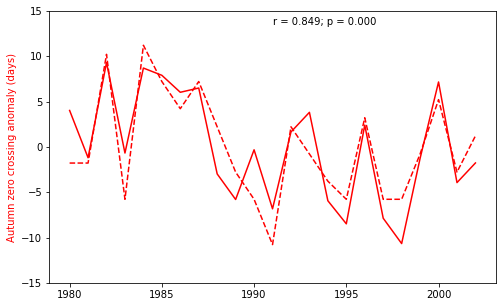

In [6]:
# brw_i_d_uk
data = deepcopy(brw_i_d_uk)
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_i_d_uk.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: seems to be NOAA data.

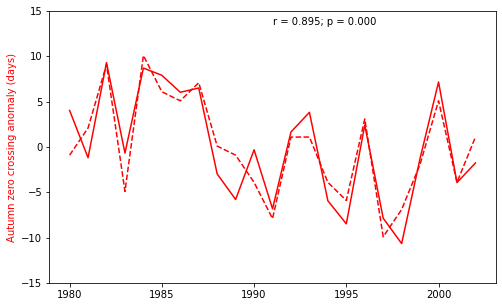

In [7]:
# brw_i_m_uk
data = deepcopy(brw_i_m_uk)
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_i_m_uk.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: insitu monthly unkown origin even closer! Still not a perfect match.

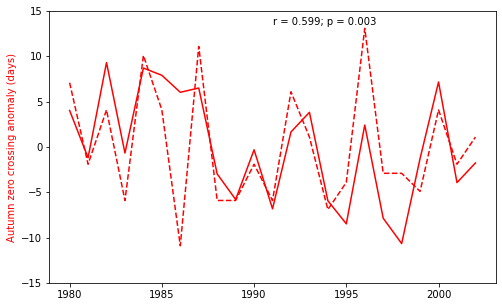

In [8]:
# brw_f_m_uk
data = deepcopy(brw_f_m_uk)
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_f_m_uk.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: flask monthly unkown origin is almost the same as the equivalent NOAA data.

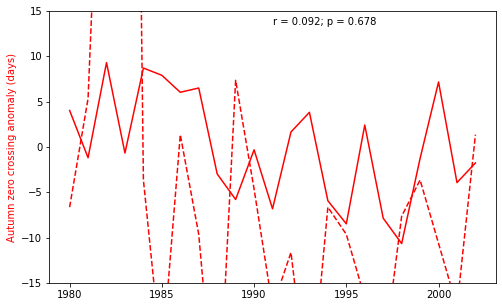

In [9]:
# brw_f_e_no
data = deepcopy(brw_f_e_no)
data.columns = ['site_code', 'year', 'month', 'day', 'hour', 'co2']
data['dec_year'] = data.apply(lambda row: ccg_dates.decimalDate(row['year'], row['month'], row['day'], row['hour']), axis=1)
data =  data[['dec_year', 'co2']]
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_f_e_no.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: terrible match with raw flask event data from NOAA

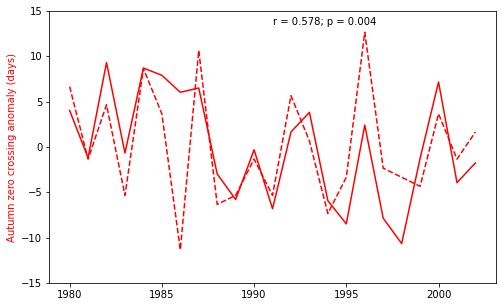

In [10]:
# brw_f_m_no
data = deepcopy(brw_f_m_no)
data['dec_year'] = data.apply(lambda row: ccg_dates.decimalDate(row['year'], row['month'], 15), axis=1)
data =  data[['dec_year', 'co2']]
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_f_m_no.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: flask monthly from NOAA not that close! This is supposedly what was used in the paper!

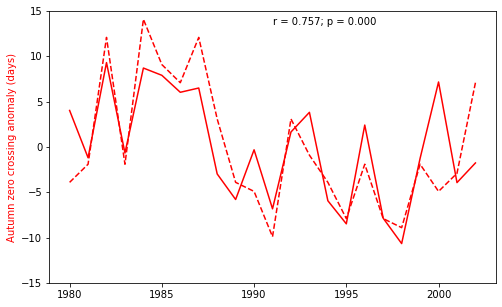

In [11]:
# brw_i_h_no
data = deepcopy(brw_i_h_no)
data = data[['decimal_year', 'co2']]
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_i_h_no.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: insitu hourly from NOAA

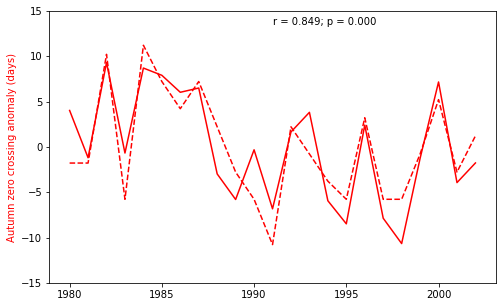

In [12]:
# brw_i_d_no
data = deepcopy(brw_i_d_no)
data = data[['decimal_year', 'co2']]
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_i_d_no.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: insitu daily unkown origin comes close! Still not a great match either

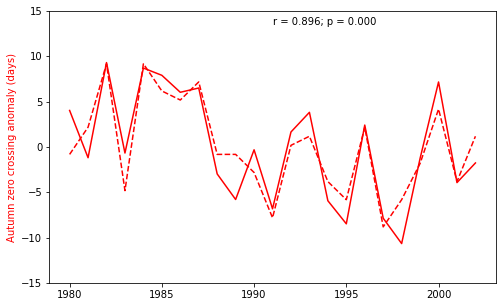

In [13]:
# brw_i_m_no
data = deepcopy(brw_i_m_no)
data = data[['decimal_year', 'co2']]
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_i_m_no.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: insitu monthly from Scripps comes quite close

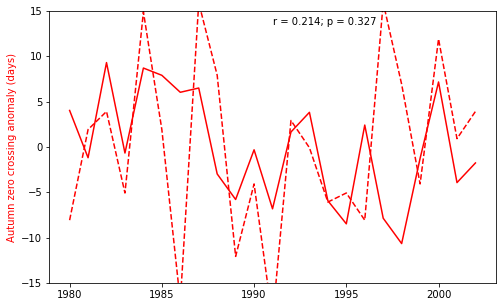

In [14]:
# brw_f_d_sc
data = deepcopy(brw_f_d_sc)
data = data[['decimal_year', 'co2']]
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_f_d_sc.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: flask daily from Scripps sucks

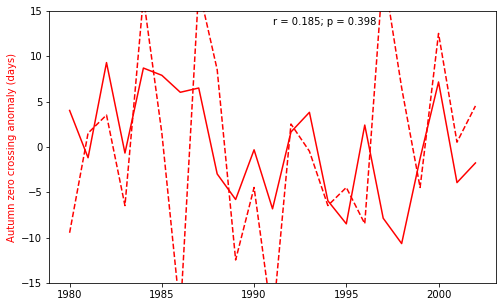

In [15]:
# brw_m_d_sc
data = deepcopy(brw_m_d_sc)
data = data[['decimal_year', 'co2']]
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_m_d_sc.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: merge daily from Scripps sucks also!

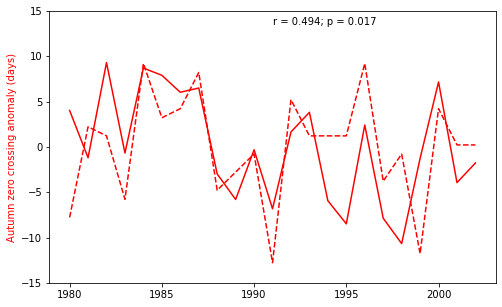

In [16]:
# brw_f_m_sc
data = deepcopy(brw_f_m_sc)
data = data[['decimal_year', 'co2']]
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_f_m_sc.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: flask monthly from Scripps better but still bad!

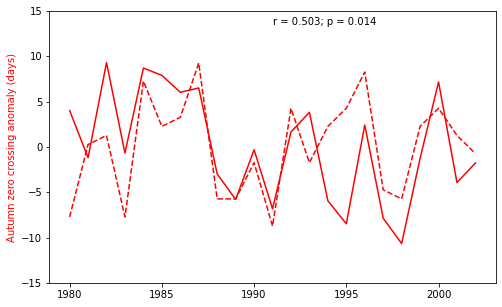

In [17]:
# brw_m_m_sc
data = deepcopy(brw_m_m_sc)
data = data[['decimal_year', 'co2']]
data.columns = ['dec_year', 'co2']
data['co2'].loc[data['co2'] < 0] = np.nan
data.to_csv('../data/piao_test/brw_m_m_sc.csv')

# Get the fits and plot
ccg_fit_out1 = ccgcrv_fit_one(data=data, pars=ccg_pars_1)
ccg_yearly = ccg_fit_out1['yearly']
plot_piao_fig1a(ccg_yearly, brw_piao_fig1a)

# Notes: merged monthly from Scripps better but still bad!